<a href="https://colab.research.google.com/github/ricardodhuelsmann/python_bibliotecas/blob/main/Seaborn/3_Gr%C3%A1ficos_de_distribui%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
sns.set_theme()

#seaborn.***displot***
###Interface de nível de figura para desenhar gráficos de distribuição em um FacetGrid.
Esta função fornece acesso a várias abordagens para visualizar a distribuição univariada ou bivariada de dados, incluindo subconjuntos de dados definidos por mapeamento semântico e facetação em vários subplots. O parâmetro kind seleciona a abordagem a ser usada:

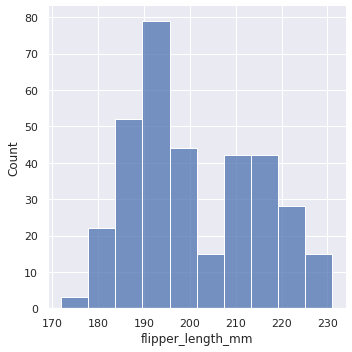

In [2]:
#O padrão do 'displot' é um histograma
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm")

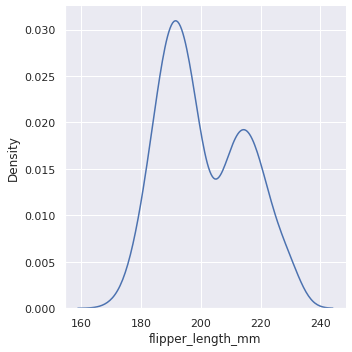

In [4]:
#Para alterar o tipo do gráfico, altera-se no parâmetro 'kind'. kde (kernel density estimate)
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

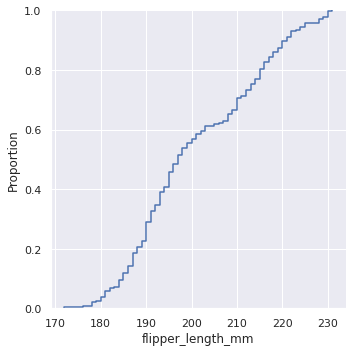

In [5]:
#Existem também a possibilidade ecdf (empirical cumulative distribution function)
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

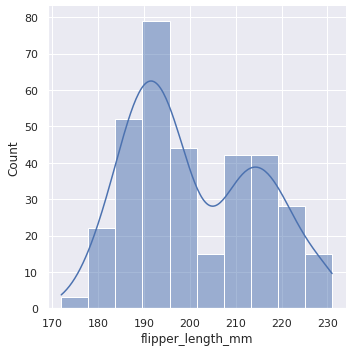

In [6]:
#Quando está sendo plotado um histograma, é possível adicionar também a curva KDE
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

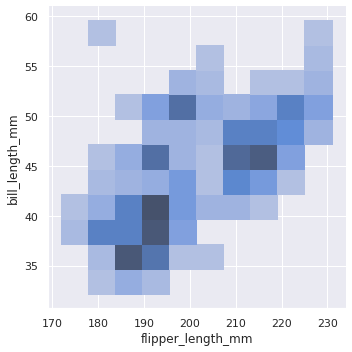

In [7]:
#O 'distplot' permite gráficos bivariados
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

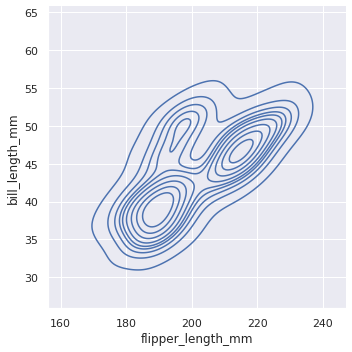

In [8]:
#É possível usar gráfico bivariado no estilo KDE também
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")

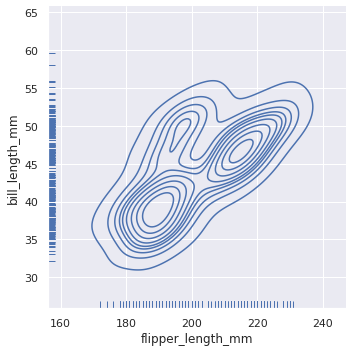

In [9]:
#Para cada tipo de gráfico, você também pode mostrar observações individuais com um "tapete" marginal:
g = sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

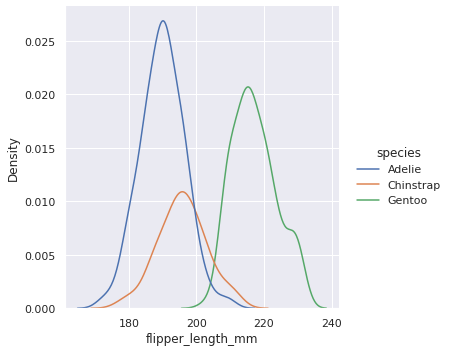

In [10]:
#Cada tipo de gráfico pode ser desenhado separadamente para subconjuntos de dados usando o mapeamento de matiz:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

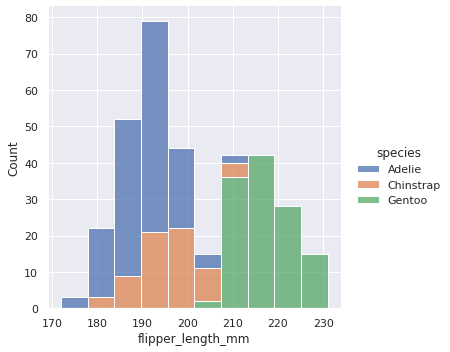

In [11]:
#Argumentos de palavra-chave adicionais são passados para a função de plotagem subjacente apropriada, permitindo personalização adicional:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

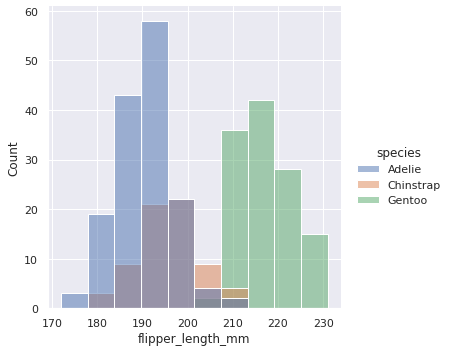

In [12]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species")

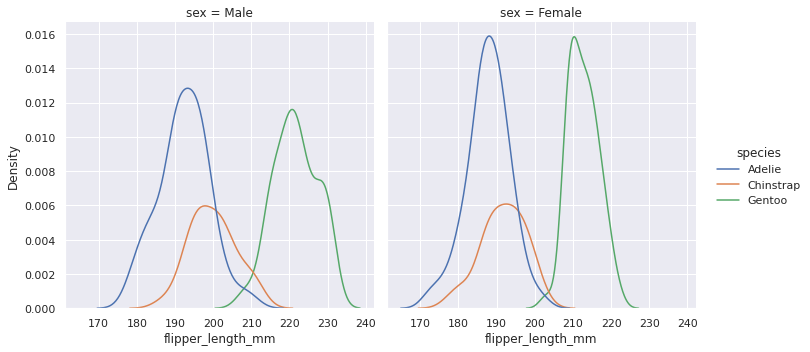

In [13]:
#É póssível mostrar subconjuntos em subtramas distintas, ou "facetas":
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

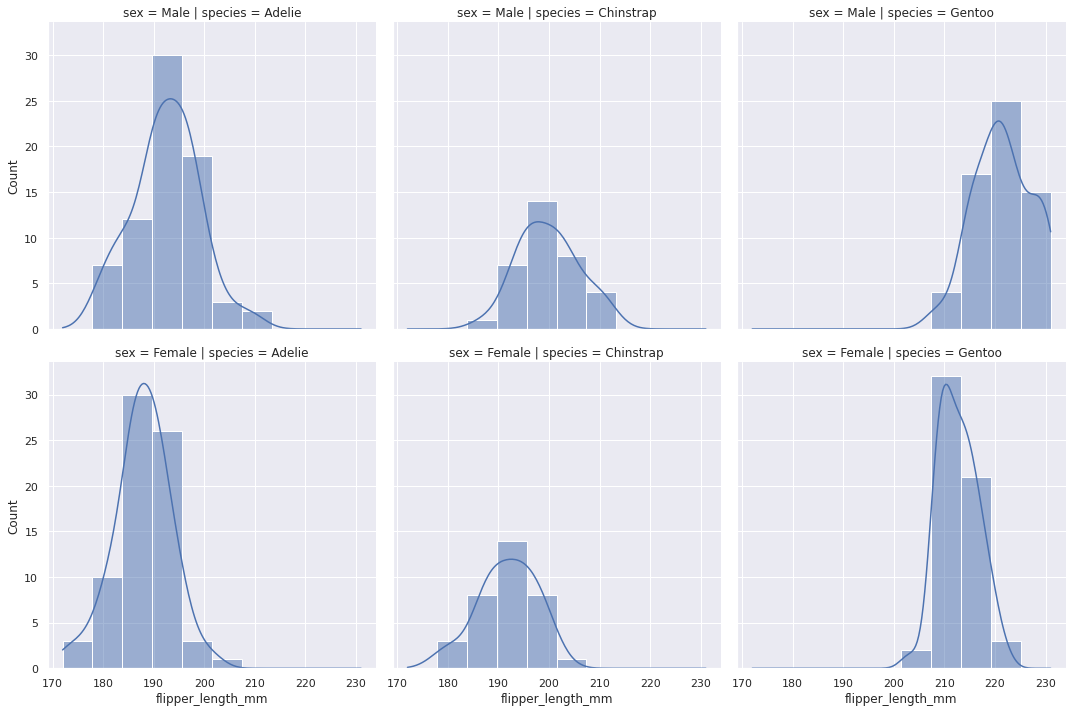

In [24]:
#Como a figura é desenhada com um FacetGrid, você controla seu tamanho e forma com os parâmetros de altura e aspecto
sns.displot(
    data=penguins, x="flipper_length_mm", col="species", row='sex',
    kde=True, height=5, aspect=1,
)

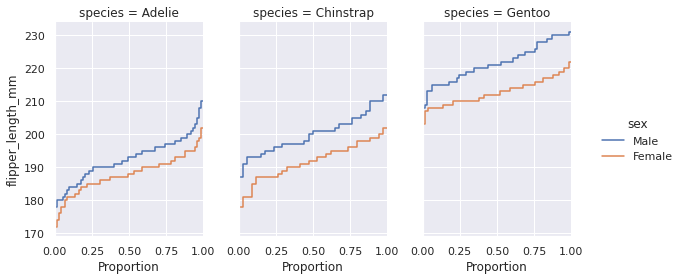

In [22]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)

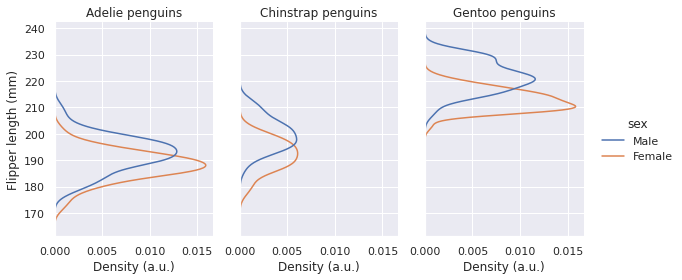

In [23]:
g = sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

#seaborn.***histplot***
##Plote histogramas univariados ou bivariados para mostrar as distribuições dos conjuntos de dados.


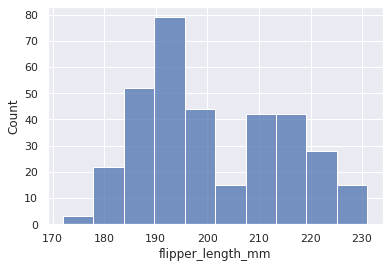

In [25]:
sns.histplot(data=penguins, x="flipper_length_mm")

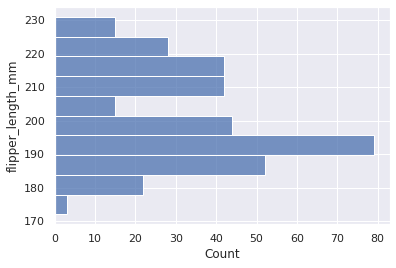

In [26]:
#Alterar o eixo de exibição
sns.histplot(data=penguins, y="flipper_length_mm")

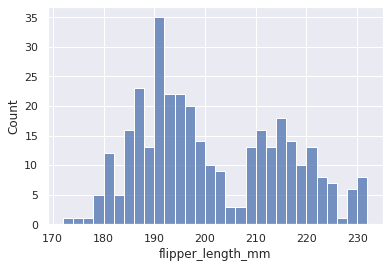

In [28]:
#É possível verificar se o histograma representa bem os dados, especificando uma largura de caixa diferente:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=2)

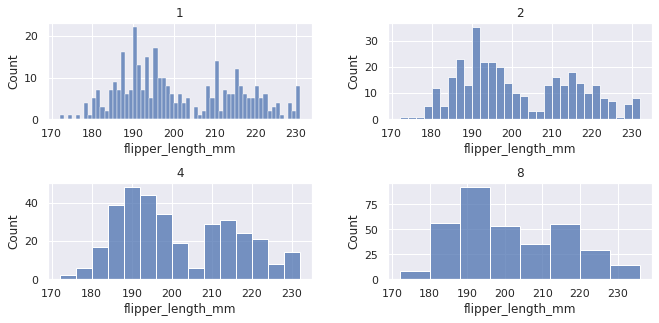

In [52]:
#Unindo código em Matplotlib com gráficos Seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(10,5))
fig.tight_layout(pad=4.0)
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=1, ax=ax[0][0]).set(title='1')
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=2, ax=ax[0][1]).set(title='2')
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=4, ax=ax[1][0]).set(title='4')
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=8, ax=ax[1][1]).set(title='8')
fig.show()

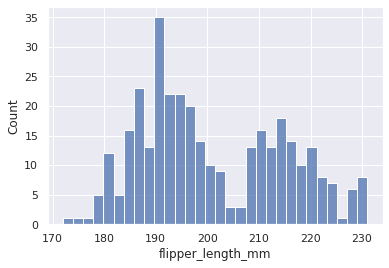

In [38]:
#É possível também determinar o número máximo de caixas
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

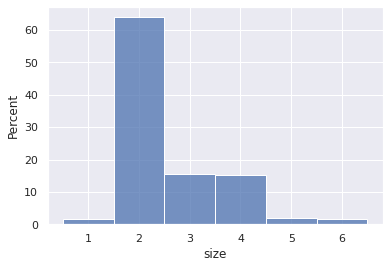

In [39]:
#Também é possível normalizar para que a altura de cada barra mostre uma probabilidade, proporção ou porcentagem, o que faz mais sentido para variáveis discretas:
tips = sns.load_dataset("tips")
sns.histplot(data=tips, x="size", stat="percent", discrete=True)

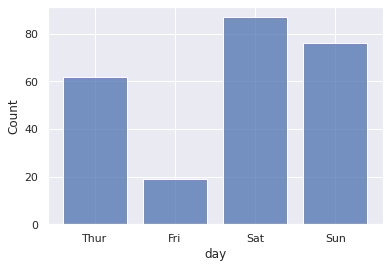

In [40]:
#Você pode até desenhar um histograma sobre variáveis categóricas (embora este seja um recurso experimental):

sns.histplot(data=tips, x="day", shrink=.8)

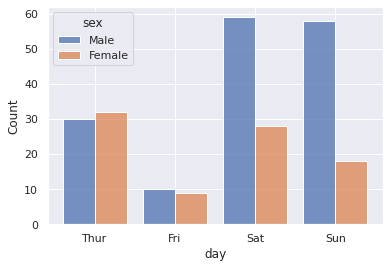

In [41]:
#Uutilizar a separação por matiz pode fazer sentido 'dividir' os níveis:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

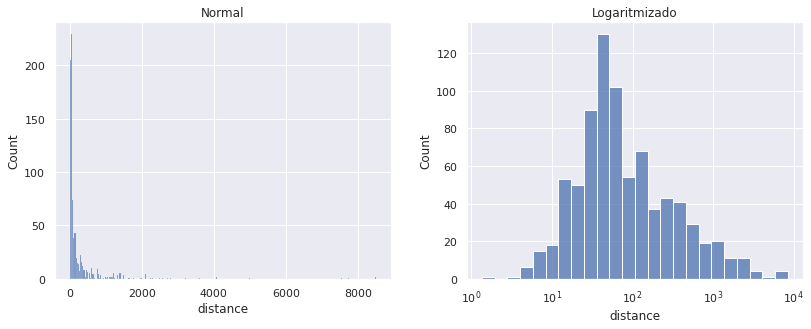

In [57]:
#Dados reais podem ser enviesados. Para distribuições fortemente enviesadas, é melhor definir as caixas em espaço logaritmizado:
planets = sns.load_dataset("planets")
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.tight_layout(pad=4.0)
sns.histplot(data=planets, x="distance", ax=ax[0]).set(title='Normal')
sns.histplot(data=planets, x="distance", log_scale=True, ax=ax[1]).set(title='Logaritmizado')
fig.show()

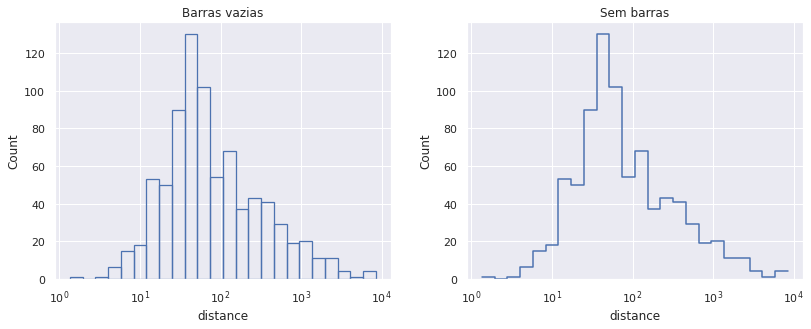

In [56]:
#É possível alterar algumas aparências do histograma:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.tight_layout(pad=4.0)
sns.histplot(data=planets, x="distance", log_scale=True, fill=False, ax=ax[0]).set(title='Barras vazias')
sns.histplot(data=planets, x="distance", log_scale=True, element="step", fill=False, ax=ax[1]).set(title='Sem barras')
fig.show()

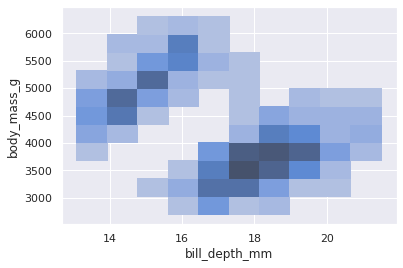

In [58]:
#Quando há duas variáveis correlacionadas, é possível gerar um histograma bivariado, na forma de mapa de calor
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

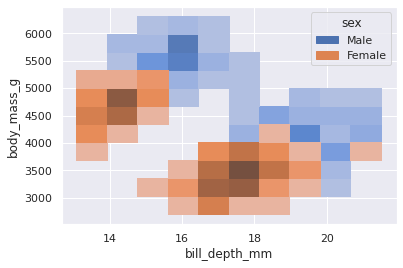

In [60]:
#Pode-se usar a matiz para diferenciar os dados
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="sex")

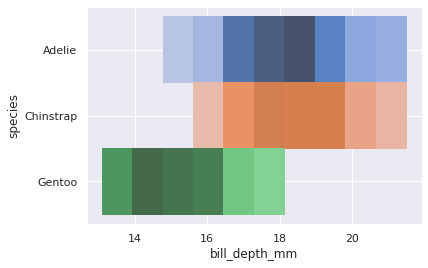

In [61]:
#Se uma variável for discreta, também é possível geraro gráfico
sns.histplot(penguins, x="bill_depth_mm", y="species", hue="species", legend=False)

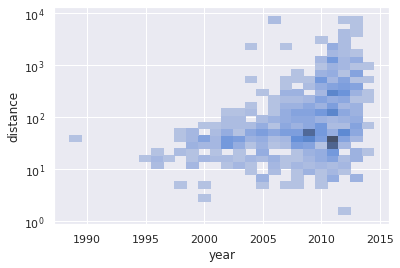

In [62]:
#É possível passar opções individuais para os eixos, de maneira independente
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
)

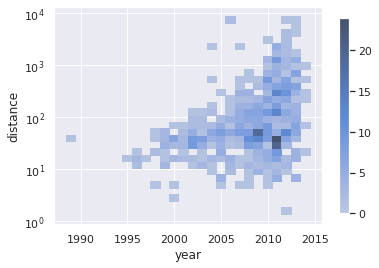

In [66]:
#É possível adicionar uma barra de cor
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.9),
)

#seaborn.***kdeplot***
###Plote as distribuições univariadas ou bivariadas usando a estimativa da densidade do kernel.

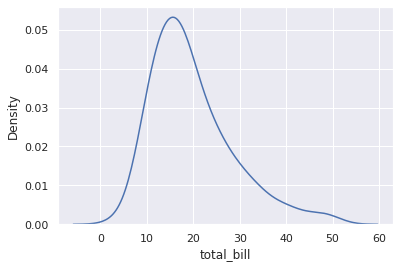

In [67]:
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")

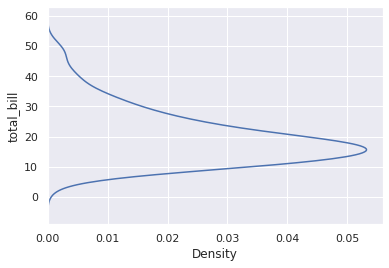

In [68]:
#Inverta o gráfico atribuindo a variável de dados ao eixo y:

sns.kdeplot(data=tips, y="total_bill")

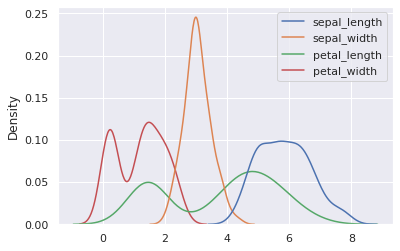

In [69]:
#Faça o gráfico das distribuições para cada coluna de um conjunto de dados de formato amplo:
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

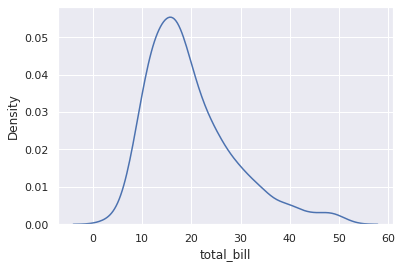

In [72]:
#Use menos suavização:

sns.kdeplot(data=tips, x="total_bill", bw_adjust=.8)

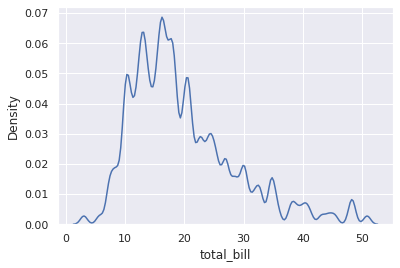

In [73]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=.2)

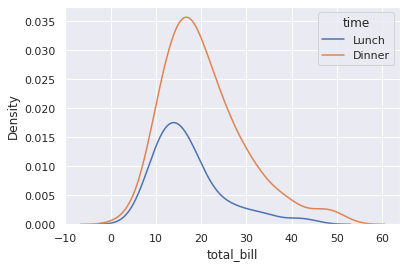

In [74]:
#separa grupos pela matiz de cores
sns.kdeplot(data=tips, x="total_bill", hue="time")

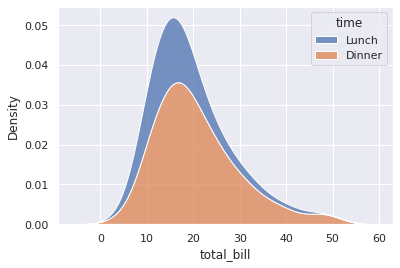

In [75]:
#É possível apresentar dados emplilhados
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

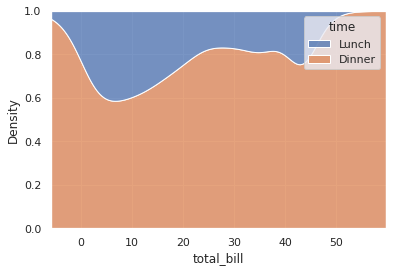

In [76]:
#Normalize a distribuição empilhada em cada valor na grade:

sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")

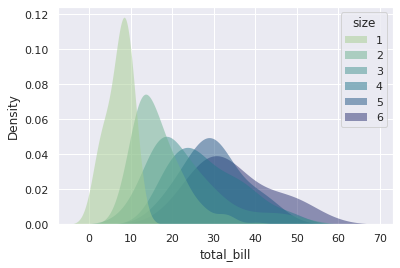

In [77]:
#modificando a aparência
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

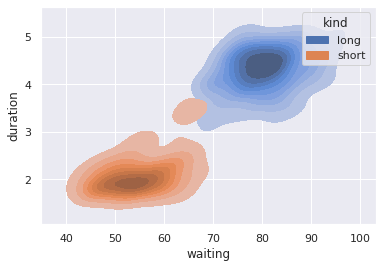

In [89]:
#Plotando gráficos bivariados
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration", hue="kind", fill=True)

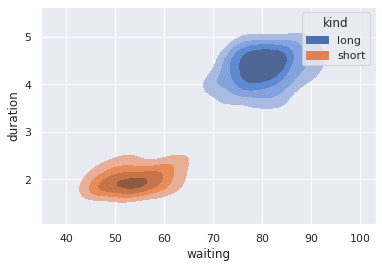

In [91]:
#Mostrar menos linhas de contorno
sns.kdeplot(
    data=geyser, x="waiting", y="duration", hue="kind",
    levels=5, thresh=.2, fill=True)

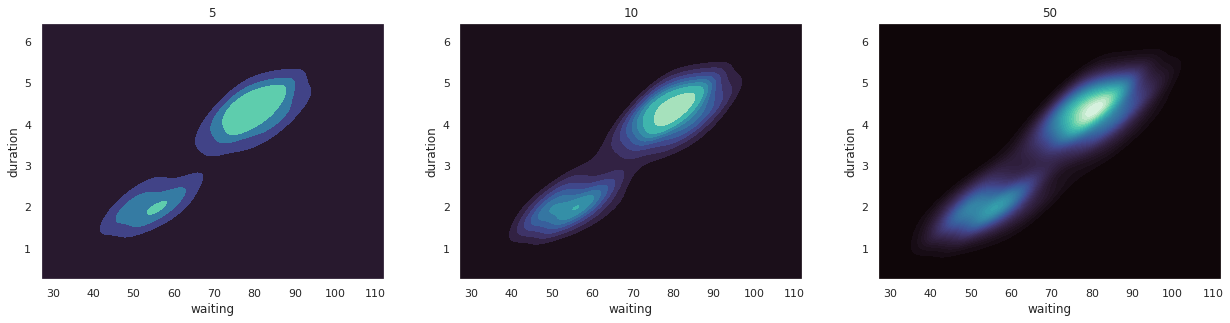

In [97]:
#Preencha a extensão dos eixos com uma distribuição uniforme, usando um mapa de cores diferente:

fig, ax = plt.subplots(1,3, figsize=(18,5))
fig.tight_layout(pad=4.0)
sns.kdeplot(data=geyser, x="waiting", y="duration", fill=True, thresh=0, levels=5, cmap="mako", ax=ax[0]).set(title='5')
sns.kdeplot(data=geyser, x="waiting", y="duration", fill=True, thresh=0, levels=10, cmap="mako", ax=ax[1]).set(title='10')
sns.kdeplot(data=geyser, x="waiting", y="duration", fill=True, thresh=0, levels=50, cmap="mako", ax=ax[2]).set(title='50')
fig.show()

#seaborn.***ecdfplot***
###Empirical cumulative distribution functions

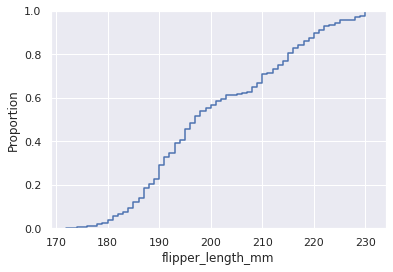

In [98]:
penguins = sns.load_dataset("penguins")
sns.ecdfplot(data=penguins, x="flipper_length_mm")

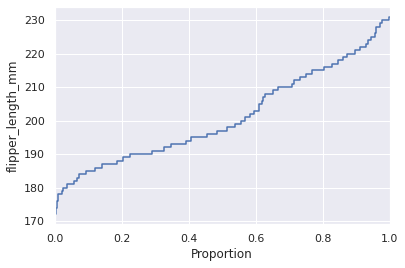

In [99]:
#Inverta o gráfico atribuindo a variável de dados ao eixo y:

sns.ecdfplot(data=penguins, y="flipper_length_mm")

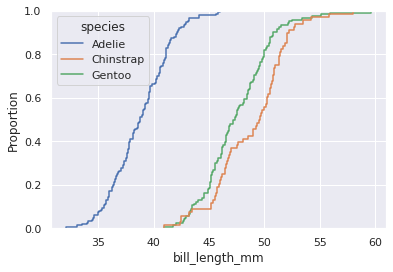

In [100]:
#Você também pode desenhar vários histogramas de um conjunto de dados de formato longo com mapeamento de matiz:

sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species")

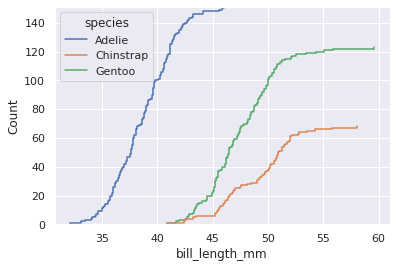

In [101]:
#O padrão anterior é normalziado, é possível ver a contagem
sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species", stat="count")